# Assignment Python 3 - Bank Marketing Data
### Nama : Muhammad Fernanda Naufal Fathoni
### Kode Peserta : PYTN-KS15-003

## Import Package Library

In [179]:
# Import package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as linear_model
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data Information


The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
#### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
####  related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')



## Data Loading

In [180]:
df = pd.read_csv('data/bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Cleaning & EDA

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [182]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [183]:
df.shape

(41188, 21)

In [184]:
# Melihat apakah terdapat missing value
df.isnull().values.sum()

0

In [185]:
# Melihat berapa jumlah yg null pada tiap kolom
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [186]:
# Mengecek data duplicate
df.duplicated().sum()

12

In [187]:
# Karena ada data yang duplicate maka dilakukan drop pada data duplikat
# dropping ALL duplicate values
df = df.drop_duplicates(keep='first')
  
#mengecek ulang apakah ada data duplicate
df.duplicated().sum()

0

In [188]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [190]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [191]:
df['age'].mean()

40.02380027200311

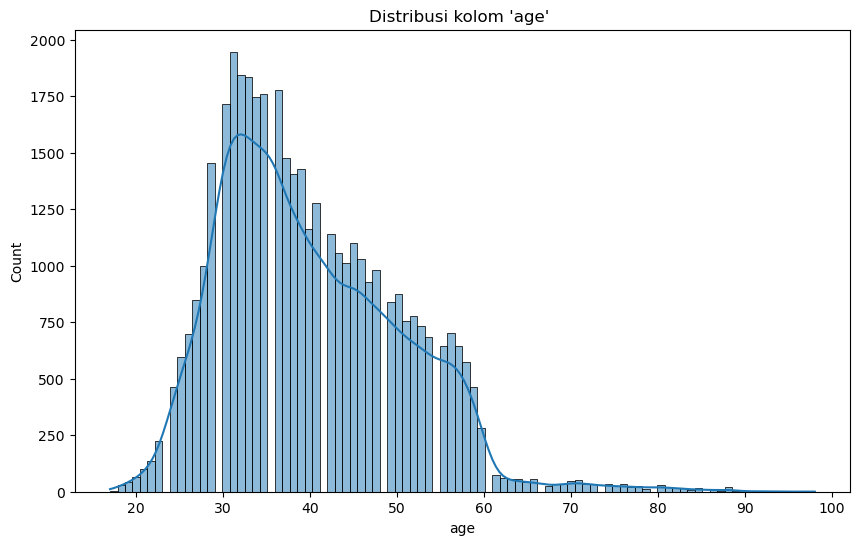

In [192]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", kde=True)
plt.title("Distribusi kolom 'age' ")
plt.show()

In [193]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [194]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [195]:
df_hasil = df['y'].value_counts()
df_hasil

no     36537
yes     4639
Name: y, dtype: int64

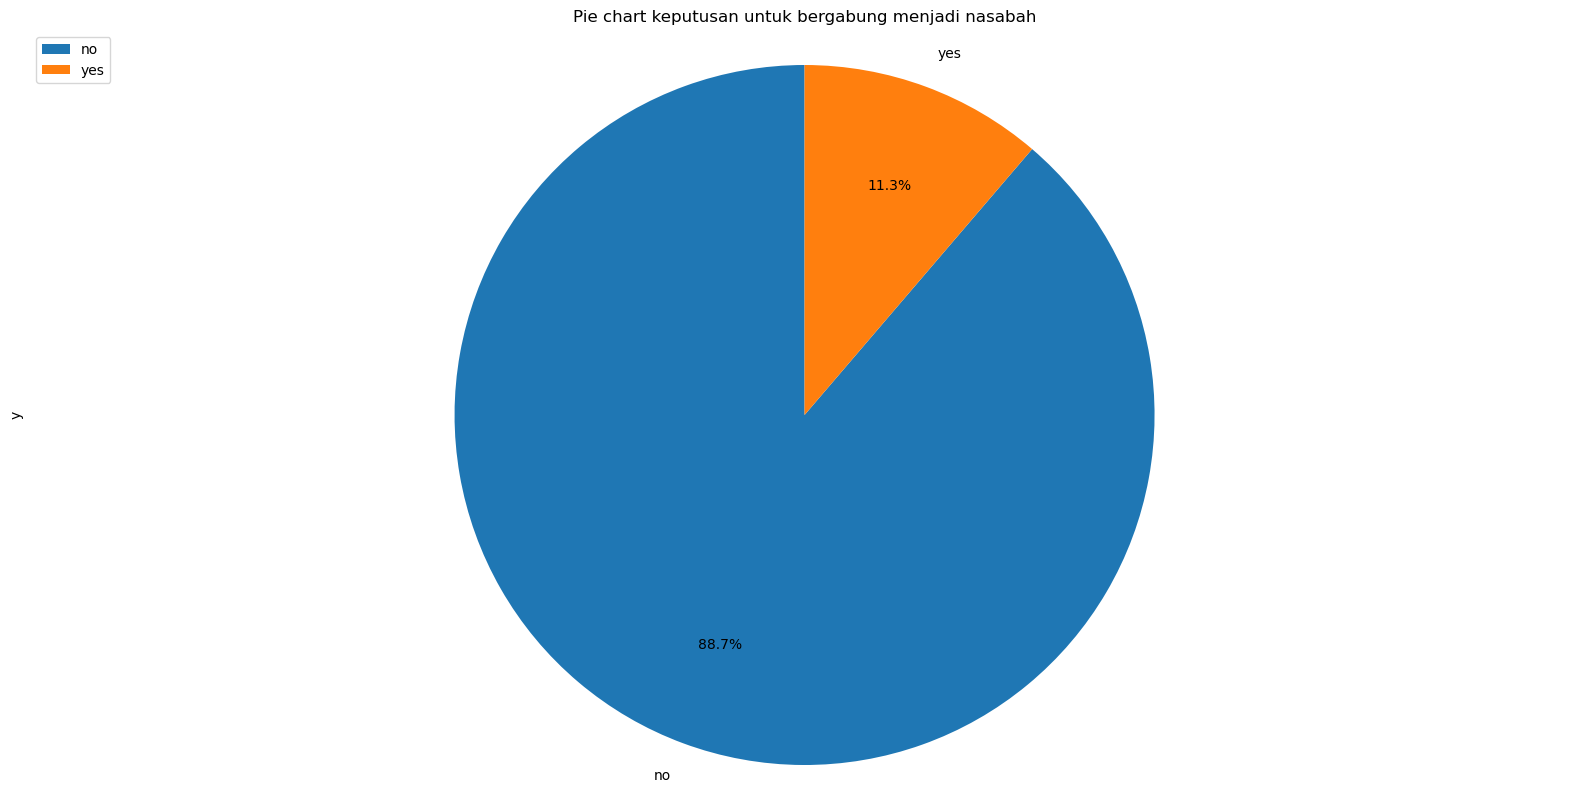

In [196]:
#inisiasi plot
explode_list = [0, 0]
df_hasil.plot(
    kind="pie",
    figsize=(20,10),
    autopct='%1.1f%%',
    startangle=90,
    label=None,
    pctdistance=0.7,
    rot = 45,
    subplots = True,
    explode=explode_list)

# membuat judul pie chart
plt.title('Pie chart keputusan untuk bergabung menjadi nasabah')

plt.axis('equal')
# membuat tabel keterangan pie chart
plt.legend(labels=df_hasil.index, loc='upper left')
# menampilkan pie chart
plt.show()

Dari hasil pie chart diatas menujukkan bahwa sejumlah 11.3% memutuskan untuk bergabung menjadi nasabah dan 88.7% tidak bergabung. Sehingga dapat disimpulkan teknik marketing melalui telepon ini kurang efektif untuk dilakukan karena jumlah yang memutuskan untuk menjadi nasabah sangat kecil

In [197]:
df_job = df['job'].value_counts()
df_job

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

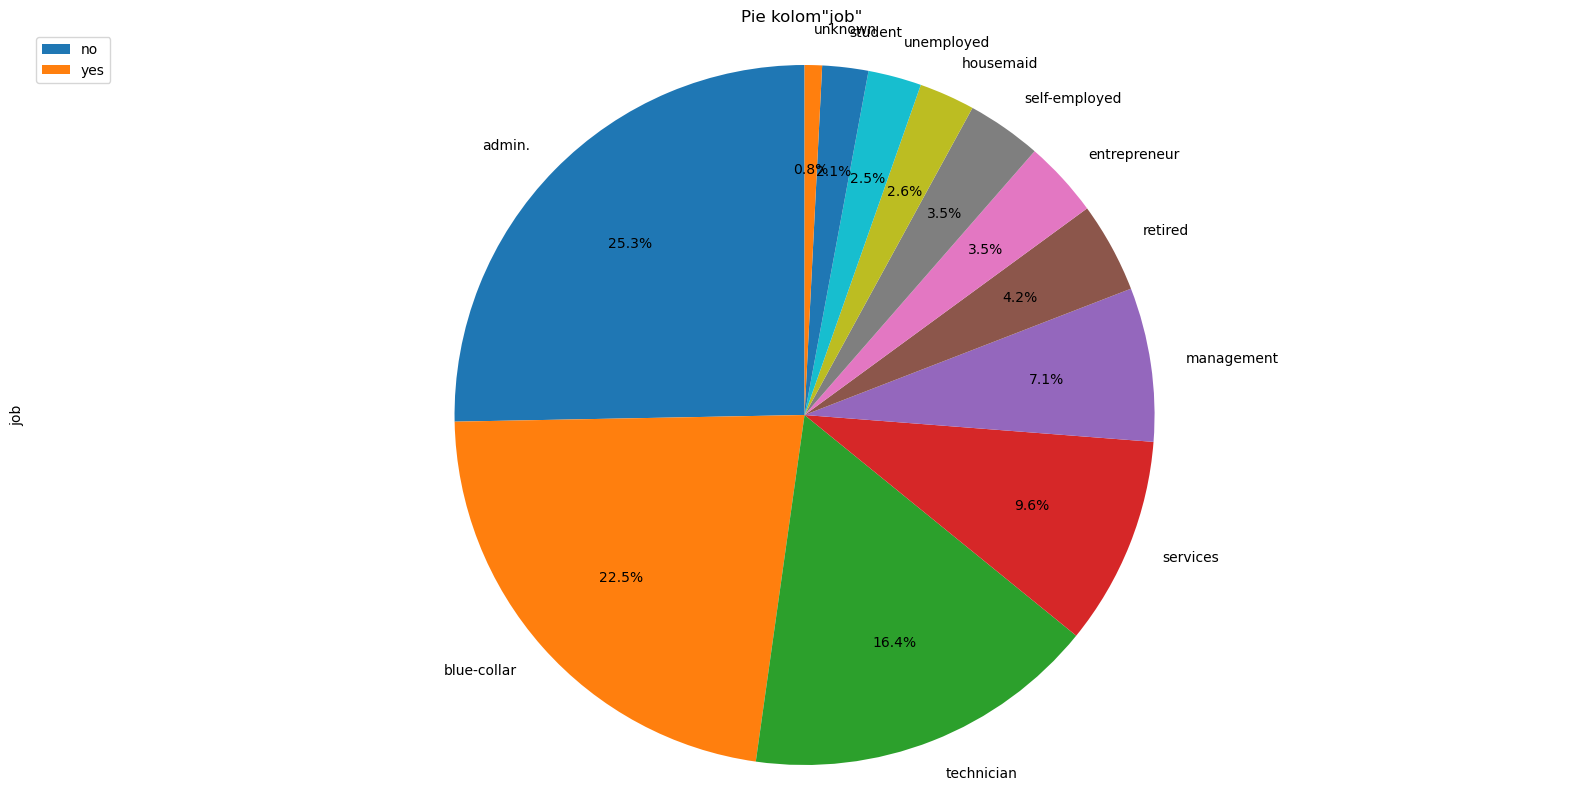

In [198]:
#inisiasi plot
explode_list = [0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0,]
df_job.plot(
    kind="pie",
    figsize=(20,10),
    autopct='%1.1f%%',
    startangle=90,
    label=None,
    pctdistance=0.7,
    rot = 45,
    subplots = True,
    explode=explode_list)

# membuat judul pie chart
plt.title('Pie kolom"job" ')

plt.axis('equal')
# membuat tabel keterangan pie chart
plt.legend(labels=df_hasil.index, loc='upper left')
# menampilkan pie chart
plt.show()

### Data Preprocessing

In [199]:
# Encoding features
# Mengubah dari yang bertipe data string menjadi sebuah code int 
label_encoder = preprocessing.LabelEncoder()

df_encode = df.select_dtypes(include='object')
df_encode = df.copy()

for column in df_encode.columns:
     df_encode[column] = label_encoder.fit_transform(df[column])

In [200]:
#Sebelum Encode
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [201]:
#setelah encode
df_encode.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


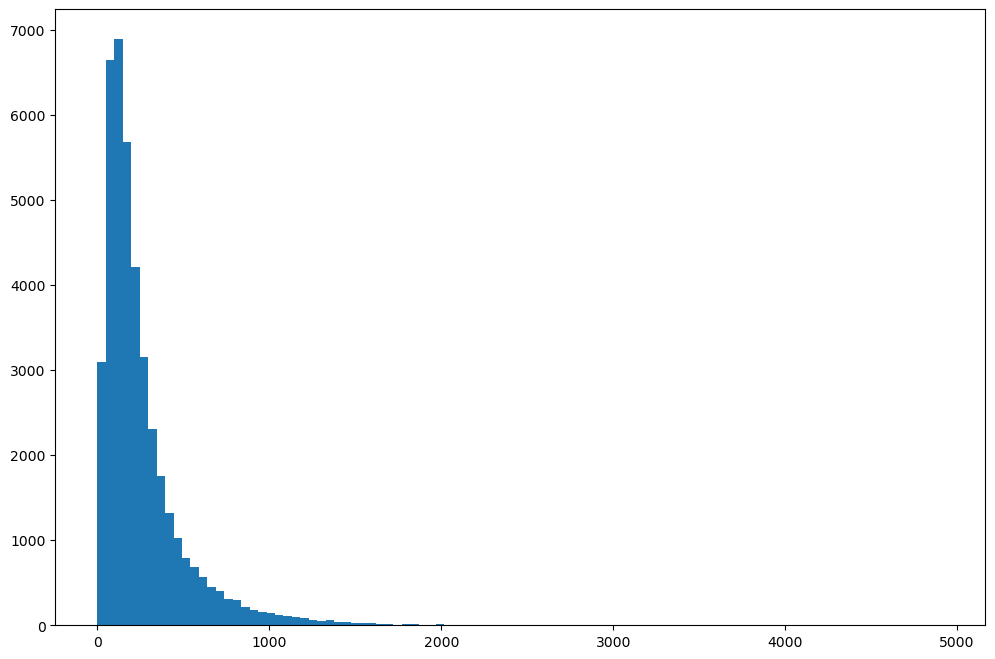

In [202]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['duration'],bins=100)
plt.show()

In [203]:
# fungsi melihat korelasi pada setiap kolom, apabila terjadi redundansi data maka akan di drop
def plot_corr(df_encode, size=27):
    corr = df_encode.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

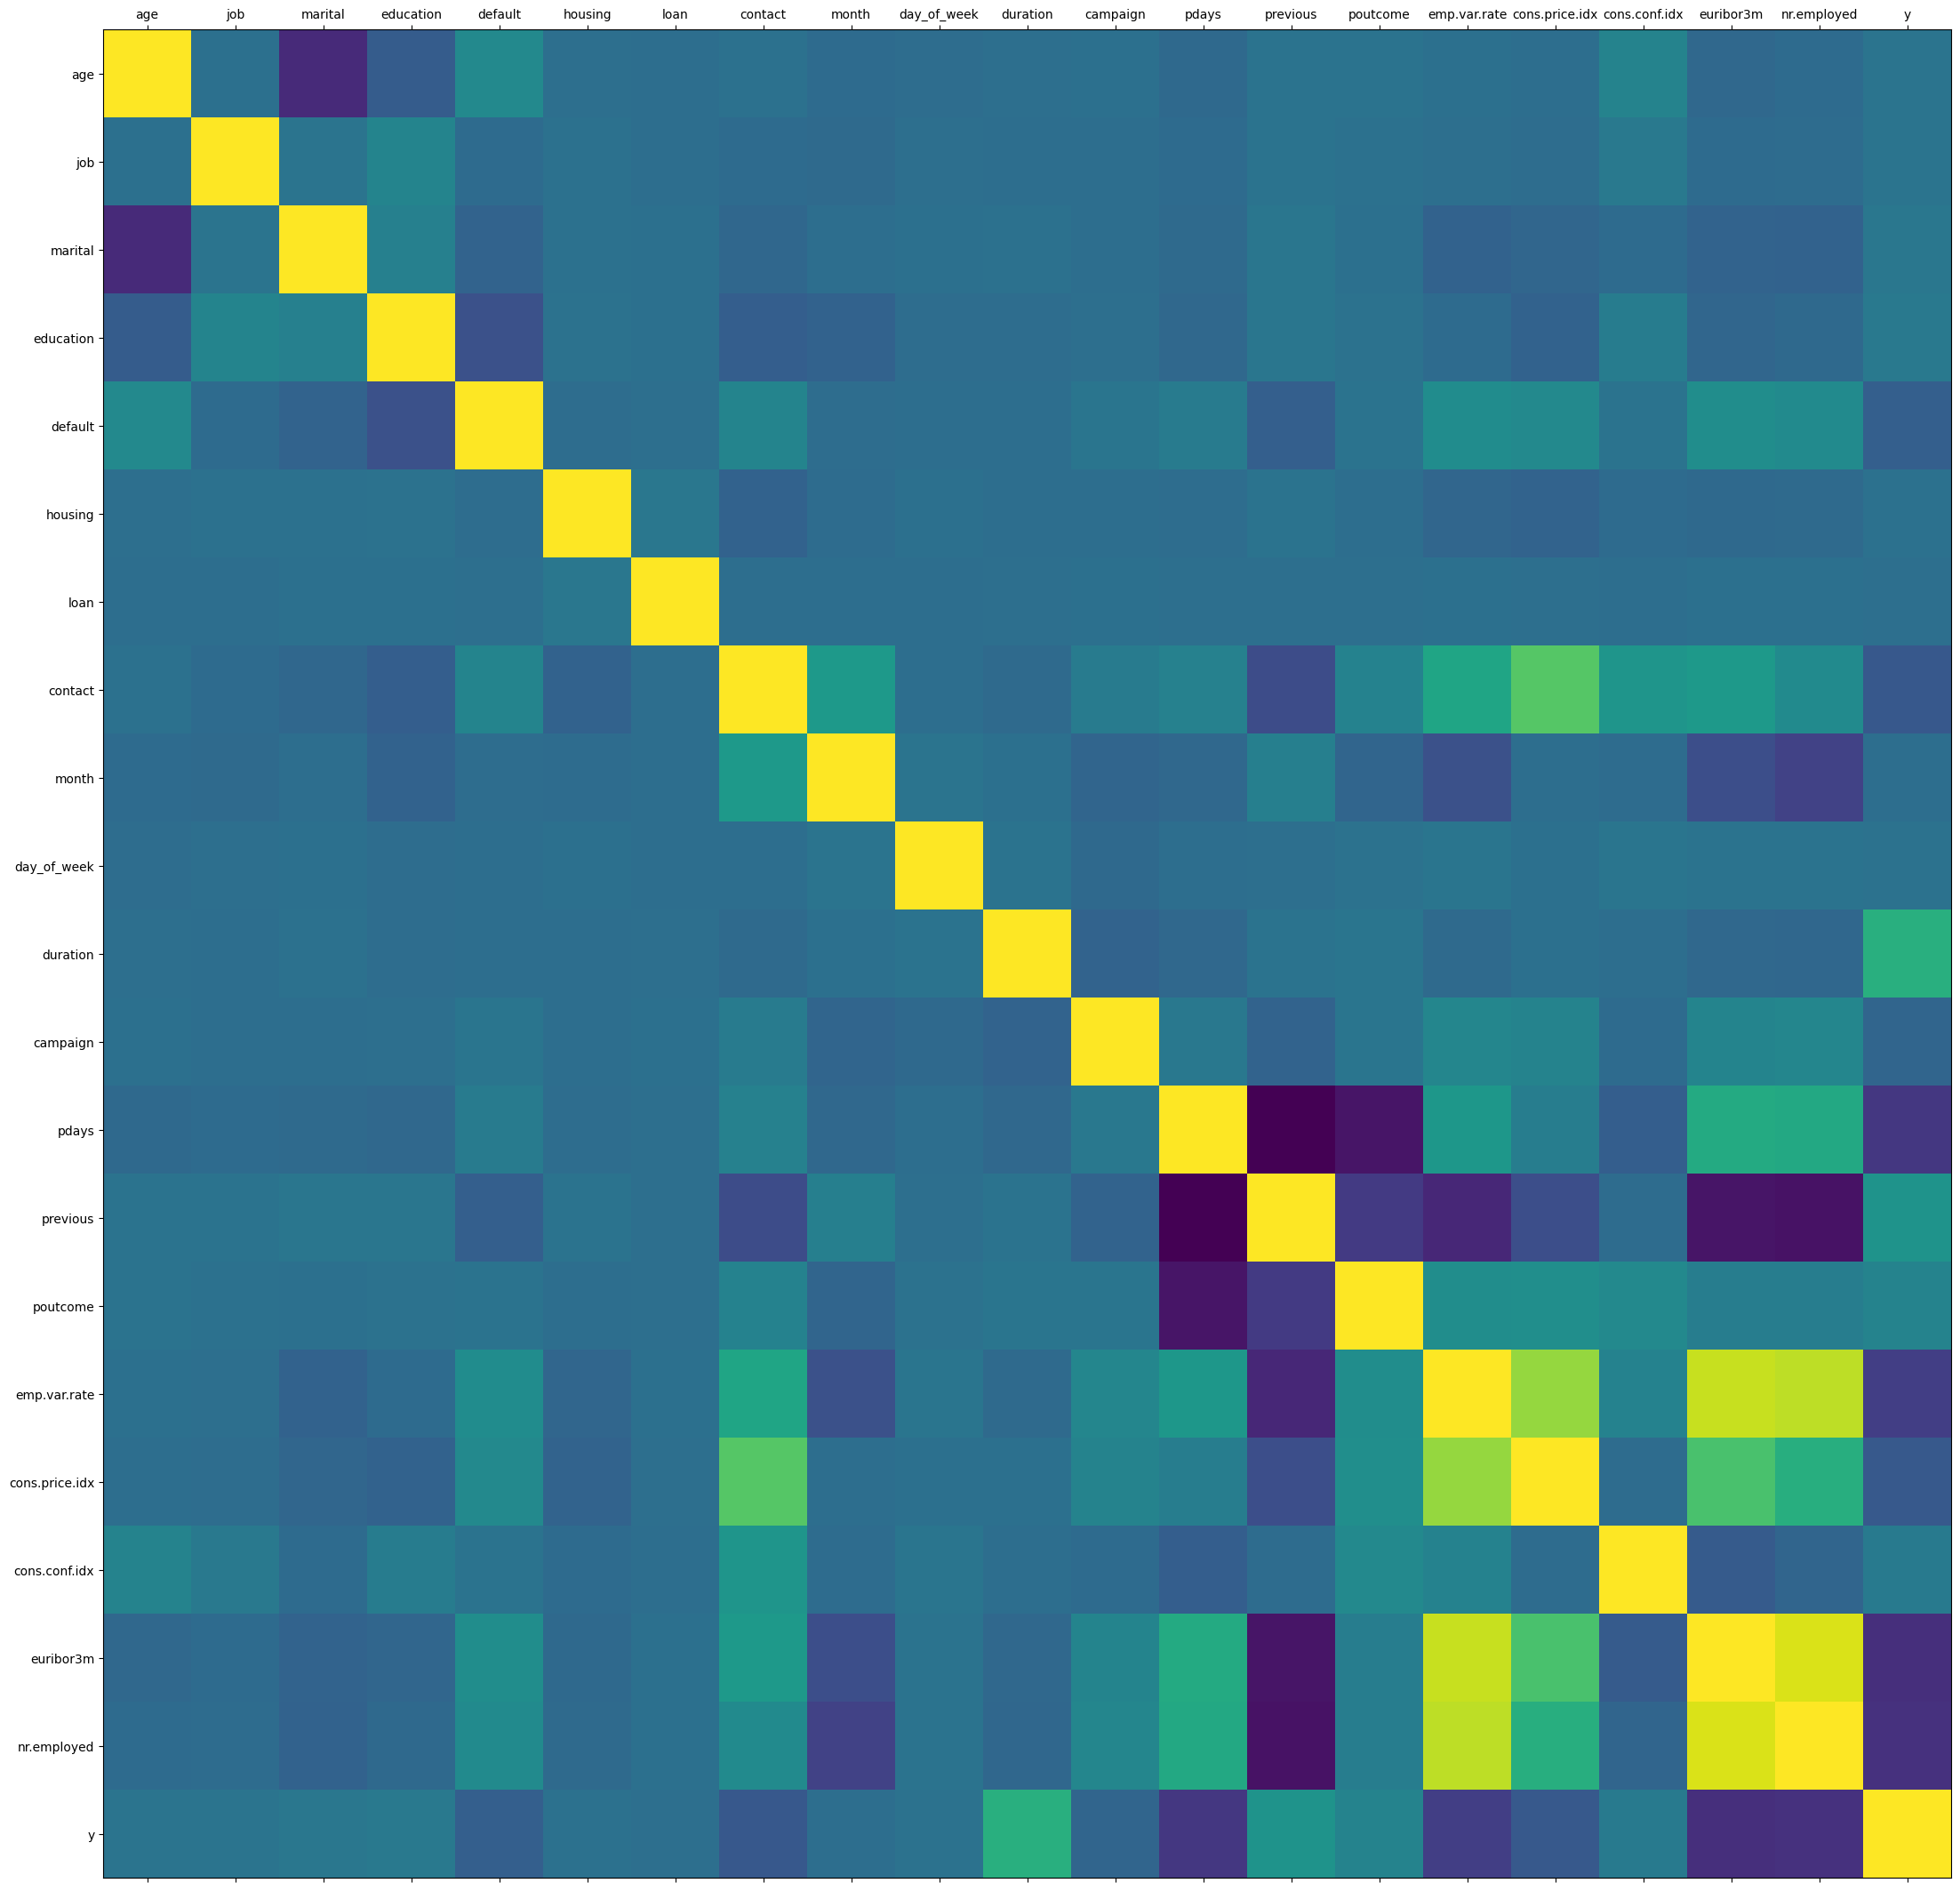

In [204]:
# print plot menggunakan fungsi
plot_corr(df_encode)

Berdasarkan plot diatas terjadi redundansi data sehingga perlu di drop

In [205]:
df_encode.drop(columns=['euribor3m', 'nr.employed', 'cons.price.idx', 'default', 'loan', 'month', 'campaign'], inplace=True)
df_encode.head()

,age,job,marital,education,housing,contact,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y
0,39,3,1,0,0,1,1,261,26,0,1,8,16,0
1,40,7,1,3,0,1,1,149,26,0,1,8,16,0
2,20,7,1,3,2,1,1,226,26,0,1,8,16,0
3,23,0,1,1,0,1,1,151,26,0,1,8,16,0
4,39,7,1,3,0,1,1,307,26,0,1,8,16,0


In [206]:
df_encode.shape

(41176, 14)

In [207]:
# Slicing X dan y
X = df_encode.iloc[:, :-1].values
y = df_encode.iloc[:, -1].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [208]:
#split data 
split_test_size = 0.30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=split_test_size, random_state=13)

## Classification
### Logistic Regression

In [251]:
datas = []
# Create a model and train it
model = LogisticRegression()

In [252]:
model.fit(X_train,y_train)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [253]:
predict_logistic_regression  =model.predict(X_test)

In [254]:
accuracy_score_log_regression = accuracy_score(y_test,predict_logistic_regression)
print('accuracy :', accuracy_score_log_regression)

accuracy : 0.9075528211770421


In [255]:
print(classification_report(y_test,predict_logistic_regression))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10971
           1       0.63      0.41      0.50      1382

    accuracy                           0.91     12353
   macro avg       0.78      0.69      0.72     12353
weighted avg       0.90      0.91      0.90     12353



##### Confusion Matrix Logistic Regresion

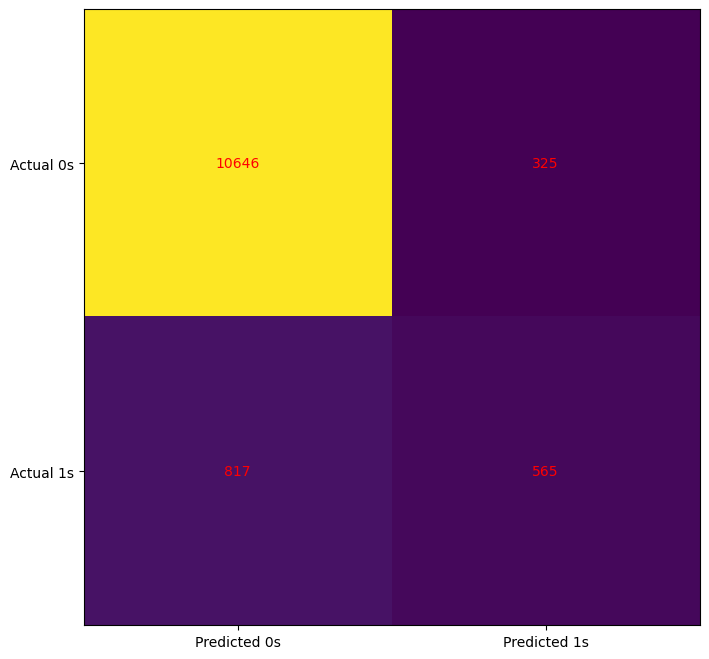

In [256]:
logistic_regression_confusion = confusion_matrix(y_test, predict_logistic_regression)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(logistic_regression_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, logistic_regression_confusion[i, j], ha='center', va='center', color='red')
plt.show()

### K-Nearest Neighbors

In [215]:
#K=3
knn_model = KNeighborsClassifier(n_neighbors = 3) 

#train model using training set
knn_model.fit(X_train, y_train)

#output predict .predict()
predict_knn = knn_model.predict(X_test) 


In [216]:
accuracy_knn = accuracy_score(y_test, predict_knn)
print('Accuracy KNN sebesar :', accuracy_knn)

Accuracy KNN sebesar : 0.8946814538978386


In [217]:
print(classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10971
           1       0.54      0.40      0.46      1382

    accuracy                           0.89     12353
   macro avg       0.73      0.68      0.70     12353
weighted avg       0.88      0.89      0.89     12353



##### Mencari nilai K atau n_neighbors
Tujuan dari menacari nilai k untuk memperoleh accuracy yang maksimal

In [218]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

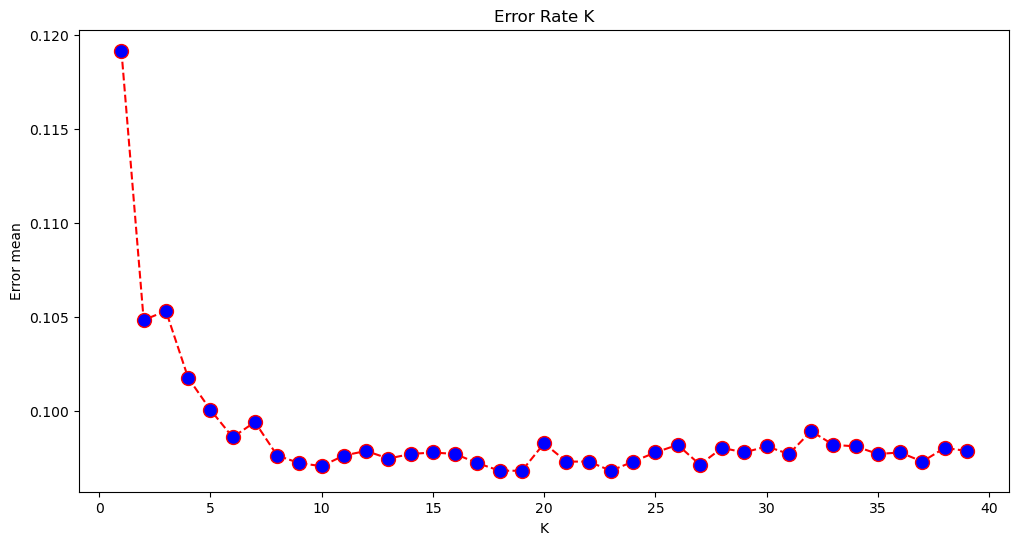

In [219]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [220]:
#K=23
knn_model = KNeighborsClassifier(n_neighbors = 23) 

#train model using training set
knn_model.fit(X_train, y_train)

#output predict .predict()
predict_knn = knn_model.predict(X_test) 


In [221]:
accuracy_knn = accuracy_score(y_test, predict_knn)
print('Accuracy KNN sebesar :', accuracy_knn)

Accuracy KNN sebesar : 0.9031814134218409


In [222]:
knn_model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1]])

array([0])

##### Confusion Matrix

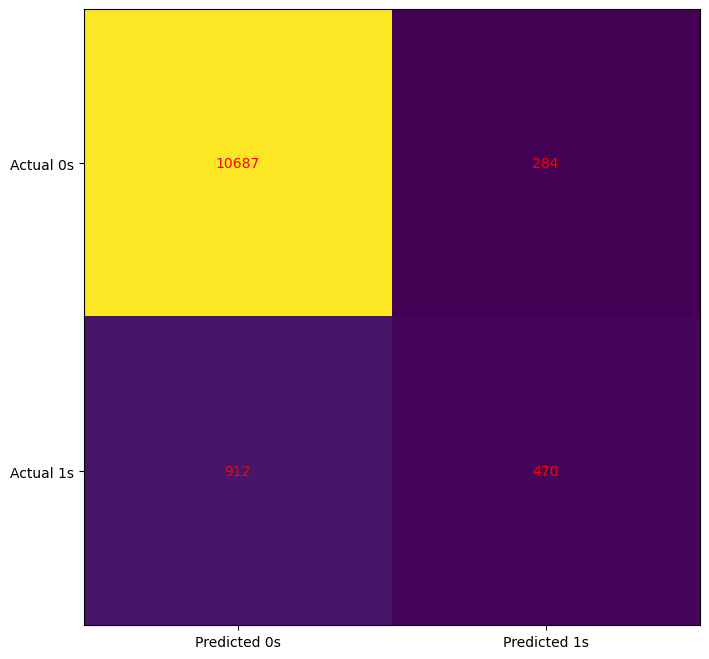

In [223]:
knn_confusion = confusion_matrix(y_test, predict_knn)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(knn_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, knn_confusion[i, j], ha='center', va='center', color='red')
plt.show()

### SVM (Suppord Vector Machine)

In [224]:
#model SVM
svm_model = LinearSVC()

#model training
svm_model.fit(X_train, y_train)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [225]:
# get predict
predict_svm = svm_model.predict(X_test)

In [226]:
#score accuracy
accuracy_score_svm = accuracy_score(y_test,predict_svm)
print('Accuracy SVM sebesar:', accuracy_score_svm)

Accuracy SVM sebesar: 0.8992147656439731


##### Confusion Matrix


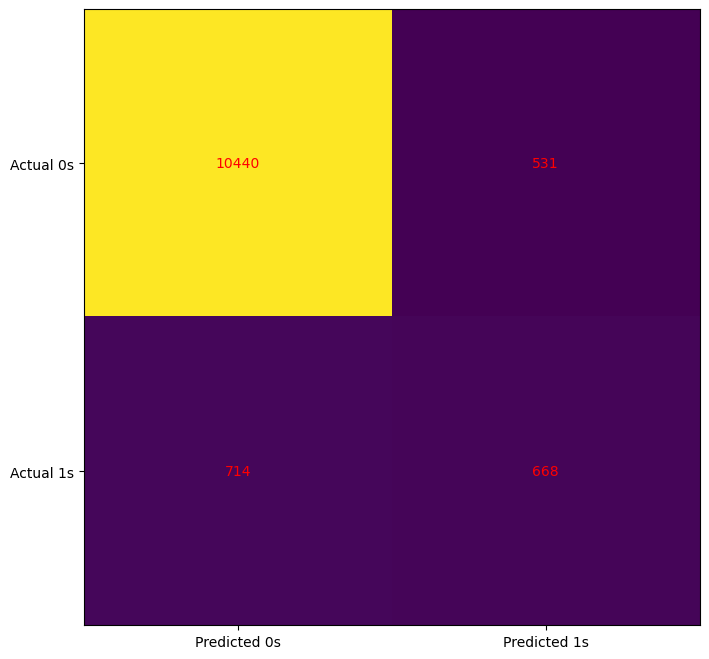

In [227]:
svm_confusion = confusion_matrix(y_test, predict_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(svm_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, svm_confusion[i, j], ha='center', va='center', color='red')
plt.show()

### Decision Tree

In [228]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train 
decision_tree = decision_tree.fit(X_train, y_train)

# Predict
predict_decision_tree = decision_tree.predict(X_test)

In [229]:
#score accuracy
accuracy_score_decision_tree = accuracy_score(y_test,predict_decision_tree)
print('Accuracy Decision Tree sebesar:', accuracy_score_decision_tree)


Accuracy Decision Tree sebesar: 0.8933052699749049


In [230]:
print(classification_report(y_test, predict_decision_tree))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10971
           1       0.57      0.19      0.29      1382

    accuracy                           0.89     12353
   macro avg       0.74      0.59      0.62     12353
weighted avg       0.87      0.89      0.87     12353



##### Confusion Matrix

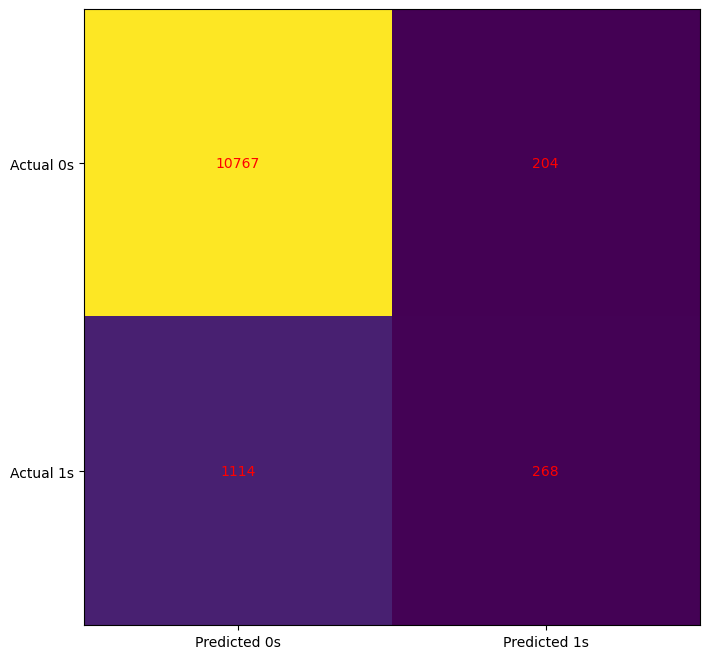

In [231]:
decision_tree_confusion = confusion_matrix(y_test, predict_decision_tree)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(decision_tree_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, decision_tree_confusion[i, j], ha='center', va='center', color='red')
plt.show()

### Random Forest

In [232]:
random_forest_model = RandomForestClassifier(n_estimators=100)

random_forest_model.fit(X_train, y_train)

predict_random_forest_model = random_forest_model.predict(X_test)

In [233]:
#score accuracy
accuracy_score_random_forest = accuracy_score(y_test,predict_random_forest_model)
print('Accuracy Decision Tree sebesar:', accuracy_score_random_forest)

Accuracy Decision Tree sebesar: 0.9128147008823767


In [234]:
print(classification_report(y_test, predict_random_forest_model))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10971
           1       0.63      0.53      0.58      1382

    accuracy                           0.91     12353
   macro avg       0.79      0.75      0.76     12353
weighted avg       0.91      0.91      0.91     12353



In [235]:
random_forest_model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1]])

array([0])

##### Confusion Matrix

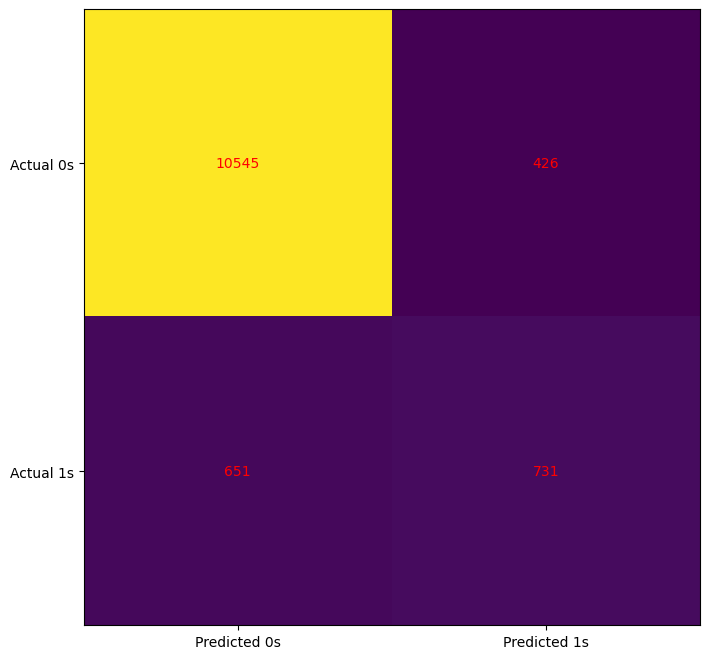

In [236]:
random_forest_confusion = confusion_matrix(y_test, predict_random_forest_model)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(random_forest_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, random_forest_confusion[i, j], ha='center', va='center', color='red')
plt.show()

### Naive Bayes

In [237]:
#create gaussian classifier
naive_bayes_model = GaussianNB()

#Train Model using training sets
naive_bayes_model.fit(X_train, y_train)

#predict the response for test dataset
predict_naive_bayes = naive_bayes_model.predict(X_test)

In [242]:
print('accuracy naive bayes:', metrics.accuracy_score(y_test, predict_naive_bayes))

accuracy naive bayes: 0.8848053104509026


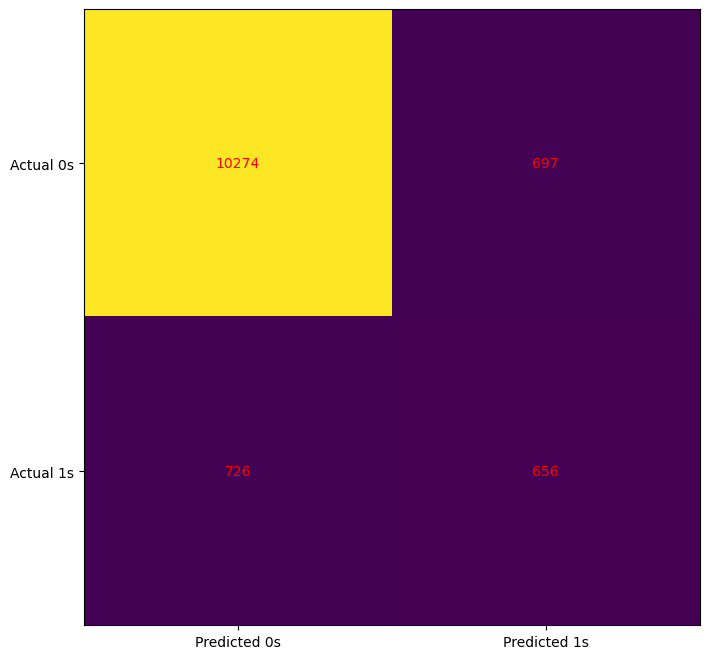

In [239]:
naive_bayes_confusion = confusion_matrix(y_test, predict_naive_bayes)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(naive_bayes_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, naive_bayes_confusion[i, j], ha='center', va='center', color='red')
plt.show()

### Summary

In [257]:
print('accuracy Logistic Regresion:', accuracy_score_log_regression)
print('Accuracy KNN sebesar :', accuracy_knn)
print('Accuracy SVM sebesar:', accuracy_score_svm)
print('Accuracy Decision Tree sebesar:', accuracy_score_decision_tree)
print('Accuracy Random forest sebesar:', accuracy_score_random_forest)
print('accuracy naive bayes:', metrics.accuracy_score(y_test, predict_naive_bayes))

accuracy Logistic Regresion: 0.9075528211770421
Accuracy KNN sebesar : 0.9031814134218409
Accuracy SVM sebesar: 0.8992147656439731
Accuracy Decision Tree sebesar: 0.8933052699749049
Accuracy Random forest sebesar: 0.9128147008823767
accuracy naive bayes: 0.8848053104509026


Dari hasil model diatas berdasarkan accuracy yang terbesar merupakan algoritma random forest